# 3. Machine Learning for Classification

Classification is a supervised learning task where the goal is to predict a categorical label. In this project, we'll predict whether a customer will churn (leave the service) or not. This is a binary classification problem because there are two possible outcomes: "churn" or "no churn".

We'll use **logistic regression**, a popular and effective algorithm for binary classification.


## 3.1 Churn prediction project

We will use a dataset of customer data from a telecommunications company to build our churn prediction model.

* **Dataset:** [Telco Customer Churn on Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)
* **Direct Link to the data:** [https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

## 3.2 Data preparation

Before we can train a model, we need to prepare the data. This involves several steps:

* **Download the data** and read it into a pandas DataFrame.
* **Inspect the data** to understand its structure and content.
* **Standardize column names and values** to ensure consistency (e.g., converting to lowercase and replacing spaces).
* **Check data types** to ensure all columns are read correctly. For example, numerical columns should have a numeric data type.
* **Prepare the target variable (churn)** for the model. This usually involves converting it into a numerical format (e.g., 1 for "yes" and 0 for "no").

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

import matplotlib.pyplot as plt # For basic data visualization

In [ ]:
# URL of the dataset
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
# Download the data from the URL and save it as 'data-week-3.csv'
# The '!' prefix allows us to run shell commands directly in the notebook.
!wget $data -O data-week-3.csv 

--2021-09-17 21:42:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954,59K  --.-KB/s    in 0,1s    

2021-09-17 21:42:33 (8,64 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data-week-3.csv')
# Display the first 5 rows to get a quick look at the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Standardize column names: convert to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Identify categorical columns (those with 'object' data type)
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Standardize the values in categorical columns: convert to lowercase and replace spaces with underscores
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
# Display the transposed head of the DataFrame for a better view of all columns
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
# The 'totalcharges' column should be numeric, but it might contain non-numeric values.
# Let's try to convert it to a numeric type.
# `errors='coerce'` will replace any values that cannot be converted with 'NaN' (Not a Number).
tc = pd.to_numeric(df.totalcharges, errors='coerce')
# We can see that there are some missing values now.

In [ ]:
# Apply the conversion to the 'totalcharges' column in the DataFrame
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
# Replace the missing values (NaN) in 'totalcharges' with 0.
# This is a simple way to handle missing numerical data.
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
# Look at the 'churn' column, which is our target variable.
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [ ]:
# Convert the 'churn' column to a numerical format.
# We map 'yes' to 1 and 'no' to 0.
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

To build and evaluate our model properly, we need to split our data into three sets:
- **Training set:** Used to train the model.
- **Validation set:** Used to tune the model's parameters and prevent overfitting.
- **Test set:** Used for the final, unbiased evaluation of the model's performance on unseen data.

We'll use Scikit-Learn's `train_test_split` function to do this. A common split is 60% for training, 20% for validation, and 20% for testing.

In [ ]:
# Import the train_test_split function from Scikit-Learn
from sklearn.model_selection import train_test_split

In [ ]:
# First, split the data into a full training set (80%) and a test set (20%).
# `random_state=1` ensures that the split is the same every time we run the code.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Next, split the full training set into a smaller training set (75% of 80% = 60% of total) 
# and a validation set (25% of 80% = 20% of total).
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
# Check the number of records in each set
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
# Reset the index of the dataframes to avoid potential issues with indexing later on.
# `drop=True` prevents the old index from being added as a column.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Separate the target variable 'churn' (y) from the features (X).
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# Remove the 'churn' column from the feature dataframes.
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 Exploratory Data Analysis (EDA)

Now we'll explore the data to understand the characteristics of the customers and their relationship with churn. We will:

* **Check for missing values** in the dataset.
* **Analyze the target variable (churn)** to see the proportion of customers who churn.
* **Examine numerical and categorical variables** to understand their distributions and identify potential predictors of churn.

In [ ]:
# We'll use the full training set for EDA to get a better representation of the data.
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
# Check for any remaining missing values in the full training set.
df_full_train.isnull().sum()
# There are no missing values, which is good.

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
# Look at the distribution of the churn variable.
# `normalize=True` gives us the proportion (percentage) instead of the count.
df_full_train.churn.value_counts(normalize=True)
# About 27% of customers in the training data have churned. This is our churn rate.

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [ ]:
# The mean of the binary churn variable is also the churn rate.
df_full_train.churn.mean()

0.26996805111821087

In [ ]:
# Identify the numerical features in our dataset.
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
# Identify the categorical features.
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:
# Check the number of unique values in each categorical column.
# This helps us understand the diversity of categories for each feature.
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis helps us identify which features are most influential in predicting the target variable (churn). We can use this information to select the best features for our model.

We will look at two simple metrics:

*   **Churn rate:** The percentage of customers who churn within a specific group (e.g., for each category of a feature).
*   **Risk ratio:** The ratio of the churn rate for a specific group to the global churn rate. A value greater than 1 means the group is more likely to churn, while a value less than 1 means it's less likely.
*   **Mutual information:** A more advanced metric from information theory that we will explore later.

#### Churn Rate

Let's calculate the churn rate for different categorical features to see how they relate to churn.

In [ ]:
# A quick look at the data again
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [ ]:
# Calculate the churn rate for female customers
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
# Calculate the churn rate for male customers
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male
# The churn rates for male and female customers are very similar.

0.2632135306553911

In [ ]:
# Get the global churn rate for comparison
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [ ]:
# Difference between global churn and female churn rate
global_churn - churn_female

-0.006855983216553063

In [ ]:
# Difference between global churn and male churn rate
# The differences are small, suggesting 'gender' might not be a very important feature.
global_churn - churn_male

0.006754520462819769

In [ ]:
# Let's check the 'partner' feature
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [ ]:
# Churn rate for customers with a partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [ ]:
# Difference from global churn
global_churn - churn_partner

0.06493474245795922

In [ ]:
# Churn rate for customers without a partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
# Difference from global churn
global_churn - churn_no_partner
# Customers without a partner are more likely to churn. This seems like a more important feature.

-0.05984095297455855

#### Risk Ratio

The risk ratio gives us a more direct measure of how a group's churn rate compares to the average.

Risk Ratio = Group Churn Rate / Global Churn Rate

In [ ]:
# Risk ratio for customers without a partner
churn_no_partner / global_churn
# A risk ratio > 1 means this group is more likely to churn.

1.2216593879412643

In [ ]:
# Risk ratio for customers with a partner
churn_partner / global_churn
# A risk ratio < 1 means this group is less likely to churn.

0.7594724924338315

This kind of analysis can be expressed in a SQL-like query:

```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```
Let's automate this for all categorical features.

In [ ]:
# Import 'display' to show DataFrames nicely in a loop
from IPython.display import display

In [ ]:
# Loop through all categorical features and calculate churn rate, difference, and risk ratio
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()
# This gives us a good overview of which features and categories are most associated with churn.

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Mutual information is a concept from information theory that measures the dependency between two variables. It tells us how much information we gain about one variable by observing another. A higher mutual information score indicates a stronger relationship.

*   [Mutual Information on Wikipedia](https://en.wikipedia.org/wiki/Mutual_information)

In [ ]:
# Import the mutual_info_score function from Scikit-Learn
from sklearn.metrics import mutual_info_score

In [ ]:
# Calculate the mutual information between 'contract' and 'churn'
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [ ]:
# Mutual information between 'gender' and 'churn'
mutual_info_score(df_full_train.gender, df_full_train.churn)
# This score is very low, confirming our earlier observation that 'gender' is not a strong predictor.

0.0001174846211139946

In [ ]:
# Mutual information between 'contract' and 'churn' again
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [ ]:
# Mutual information between 'partner' and 'churn'
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [ ]:
# Create a function to calculate mutual information with the churn variable
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [ ]:
# Apply the function to all categorical features and sort them by their mutual information score.
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)
# 'contract' is the most important feature, followed by 'onlinesecurity' and 'techsupport'.

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

For numerical features, we can use the **correlation coefficient** to measure the strength of a linear relationship between two variables. The correlation coefficient ranges from -1 to 1:

*   **1:** Perfect positive correlation
*   **-1:** Perfect negative correlation
*   **0:** No linear correlation

*   [Pearson Correlation Coefficient on Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [ ]:
# Check the maximum value of 'tenure'
df_full_train.tenure.max()

72

In [ ]:
# Calculate the correlation between numerical features and churn.
# We use `.abs()` to see the magnitude of the correlation, regardless of the direction.
df_full_train[numerical].corrwith(df_full_train.churn).abs()
# 'tenure' has the highest negative correlation, meaning the longer a customer stays, the less likely they are to churn.
# 'monthlycharges' has a positive correlation.

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [ ]:
# Churn rate for customers with tenure of 2 months or less
df_full_train[df_full_train.tenure <= 2].churn.mean()
# Very high churn rate for new customers.

0.5953420669577875

In [ ]:
# Churn rate for customers with tenure between 3 and 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()
# Still high, but lower than the newest customers.

0.3994413407821229

In [ ]:
# Churn rate for customers with tenure longer than 12 months
df_full_train[df_full_train.tenure > 12].churn.mean()
# Much lower churn rate for long-term customers.

0.17634908339788277

In [ ]:
# Churn rate for customers with low monthly charges
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [ ]:
# Churn rate for customers with medium monthly charges
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [ ]:
# Churn rate for customers with high monthly charges
df_full_train[df_full_train.monthlycharges > 50].churn.mean()
# Higher monthly charges are associated with higher churn.

0.32499341585462205

## 3.8 One-hot encoding

Machine learning models require numerical input. To use our categorical features, we need to convert them into a numerical format. A common method for this is **one-hot encoding**.

For each categorical feature, one-hot encoding creates new binary (0 or 1) columns for each of its unique values. For example, if a "color" feature has values "red", "green", and "blue", it would be converted into three new features: "color_red", "color_green", and "color_blue".

We'll use Scikit-Learn's `DictVectorizer` to do this, which is convenient when working with lists of dictionaries.

In [ ]:
# Import DictVectorizer from Scikit-Learn
from sklearn.feature_extraction import DictVectorizer

In [ ]:
# Create an instance of DictVectorizer. `sparse=False` means the output will be a dense NumPy array.
dv = DictVectorizer(sparse=False)

# Convert the training data (both categorical and numerical features) to a list of dictionaries.
train_dict = df_train[categorical + numerical].to_dict(orient='records')
# Fit the vectorizer to the training data and transform it into a feature matrix X_train.
# `fit_transform` learns the categories and then creates the one-hot encoded matrix.
X_train = dv.fit_transform(train_dict)

# Convert the validation data to a list of dictionaries.
val_dict = df_val[categorical + numerical].to_dict(orient='records')
# Transform the validation data using the already fitted vectorizer.
# We use `transform` here, not `fit_transform`, to ensure that the same features are used as in the training data.
X_val = dv.transform(val_dict)

## 3.9 Logistic regression

Logistic regression is a classification algorithm that models the probability of a binary outcome. It's similar to linear regression, but with a key difference: it uses the **sigmoid function** to squash the output of the linear equation into the range [0, 1].

*   **Linear Regression:** `output = w0 + w * x` (output can be any real number)
*   **Logistic Regression:** `probability = sigmoid(w0 + w * x)` (output is a probability between 0 and 1)

The sigmoid function is defined as: `sigmoid(z) = 1 / (1 + exp(-z))`

In [ ]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Create a range of values to visualize the sigmoid function
z = np.linspace(-7, 7, 51)

In [ ]:
# For large positive inputs, sigmoid approaches 1
sigmoid(10000)

1.0

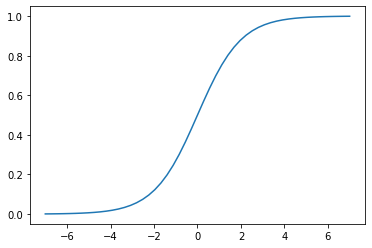

In [ ]:
# Plot the sigmoid function to see its S-shaped curve
plt.plot(z, sigmoid(z))

In [ ]:
# A conceptual implementation of linear regression
def linear_regression(xi):
    result = w0  # bias term
    
    for j in range(len(w)):
        result = result + xi[j] * w[j] # add weighted features
        
    return result

In [ ]:
# A conceptual implementation of logistic regression
def logistic_regression(xi):
    score = w0 # bias term
    
    for j in range(len(w)):
        score = score + xi[j] * w[j] # add weighted features
        
    result = sigmoid(score) # apply sigmoid to get a probability
    return result

## 3.10 Training logistic regression with Scikit-Learn

Now we'll use Scikit-Learn's `LogisticRegression` class to train our model.

*   **Train a model** with Scikit-Learn on the training data.
*   **Apply it to the validation dataset** to get predictions.
*   **Calculate the accuracy** to evaluate the model's performance.

In [ ]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create an instance of the model.
model = LogisticRegression(solver='lbfgs', random_state=1)
# `solver='lbfgs'` is a good default for many problems.
# `random_state` is used for reproducibility in some solvers.

# Train the model on the training data.
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Get the intercept (bias term, w0) of the trained model
model.intercept_[0]

-0.10903395348323511

In [ ]:
# Get the coefficients (weights, w) of the trained model
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [ ]:
# Make predictions on the validation set.
# `predict_proba` returns the probabilities for each class (0 and 1).
# We are interested in the probability of churn (class 1).
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
# To make a binary prediction, we can use a threshold of 0.5.
# If the probability is >= 0.5, we predict churn (True). Otherwise, we predict no churn (False).
churn_decision = (y_pred >= 0.5)

In [ ]:
# Calculate the accuracy of our model on the validation set.
# Accuracy is the proportion of correct predictions.
(y_val == churn_decision).mean()

0.8034066713981547

In [ ]:
# Let's create a DataFrame to compare our predictions with the actual values.
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [ ]:
# Add a column to see if the prediction was correct
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
# The mean of the 'correct' column is the accuracy.
df_pred.correct.mean()

0.8034066713981547

In [ ]:
# The predicted labels (0 or 1)
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

Understanding why a model makes certain predictions is crucial. For linear models like logistic regression, we can interpret the coefficients (weights) to understand the impact of each feature.

*   **Positive coefficient:** A higher feature value increases the probability of churn.
*   **Negative coefficient:** A higher feature value decreases the probability of churn.

We can also train a smaller, simpler model with fewer features to make interpretation even easier.

In [ ]:
# Example of using zip to combine two lists into a dictionary
a = [1, 2, 3, 4]
b = 'abcd'

In [74]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [ ]:
# Create a dictionary that maps feature names to their corresponding weights.
# This helps in interpreting the model.
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
# We can see which features have positive or negative impacts on churn probability.

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [ ]:
# Let's train a smaller model with just a few important features for easier interpretation.
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
# Prepare the data for the small model
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [78]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
# Create and fit a new DictVectorizer for the small feature set
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [ ]:
# Get the feature names from the small vectorizer
dv_small.get_feature_names_out()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [ ]:
# Transform the small training data
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
# Train the small logistic regression model
model_small = LogisticRegression(solver='lbfgs', random_state=1)
model_small.fit(X_train_small, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Get the intercept of the small model
w0 = model_small.intercept_[0]
w0

-2.476775657751665

In [ ]:
# Get the coefficients of the small model
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [ ]:
# Map the feature names to their weights for the small model
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [ ]:
# Example calculation of the linear part of logistic regression for a customer
# with a two-year contract, tenure of 24 months, and monthly charges of 30.
# The formula is: w0 + w_contract_2y * 1 + w_tenure * 24 + w_monthlycharges * 30
# (assuming contract_month-to-month and contract_one_year are 0)
# This is just a conceptual example. The actual calculation would use the correct weights.
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [ ]:
# Applying the sigmoid function to the result gives the probability of churn
sigmoid(_)

0.030090303318277657

## 3.12 Using the model

After training and validating the model, the final step is to use it to make predictions on new data. We can train the model on the entire training dataset (including the validation set) to make it more robust, and then use it to predict churn for the customers in our test set.

In [ ]:
# Prepare the full training data
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
# Create and fit a new DictVectorizer on the full training data
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
# Get the target variable for the full training data
y_full_train = df_full_train.churn.values

In [ ]:
# Train the final model on the full training data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_full_train, y_full_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prepare the test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
# Transform the test data using the fitted vectorizer
X_test = dv.transform(dicts_test)

In [ ]:
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
# Get the binary predictions using a 0.5 threshold
churn_decision = (y_pred >= 0.5)

In [ ]:
# Calculate the final accuracy on the test set
(churn_decision == y_test).mean()
# This gives us an idea of how well our model will perform on new, unseen data.

0.815471965933286

In [ ]:
# The actual churn values for the test set
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Let's take a single customer from the test set to see how the model works for an individual.
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [ ]:
# Transform the customer's data into a feature vector
# Note: `dv.transform` expects a list of dictionaries.
X_small = dv.transform([customer])

In [ ]:
# Predict the probability of churn for this customer
model.predict_proba(X_small)[0, 1]

0.5968852088293909

In [ ]:
# The actual churn status for this customer
y_test[-1]
# In this case, the model's prediction is consistent with the actual outcome.

1

## 3.13 Summary

In this project, we've built a churn prediction model from scratch. Here are the key takeaways:

*   **Feature importance** analysis (using risk ratio, mutual information, and correlation) helps us understand our data and select the most predictive features.
*   **One-hot encoding** is a crucial step for converting categorical features into a numerical format that machine learning models can understand. `DictVectorizer` is a convenient tool for this.
*   **Logistic regression** is a powerful and interpretable linear model for binary classification. It outputs a probability that can be used to make predictions.
*   The **weights** of a trained logistic regression model can be interpreted to understand the influence of each feature on the prediction.

## 3.14 Explore more

Here are some ideas to continue learning and practicing:

*   **Experiment with feature selection:** Try training a model with only the most important features and see how it affects performance.
*   **Apply Scikit-Learn to the previous regression project:**
    *   Re-implement the train/validation/test split using Scikit-Learn.
    *   Use `LinearRegression` and `Ridge` from Scikit-Learn instead of the manual implementation. Find the best regularization parameter for `Ridge`.
*   **Try other projects:**
    *   **Lead Scoring:** Predict the likelihood of a lead converting. [Dataset](https://www.kaggle.com/ashydv/leads-dataset)
    *   **Credit Card Default Prediction:** Predict if a customer will default on their credit card payment. [Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)